<a href="https://colab.research.google.com/github/lazy-wolf/python-class-notes/blob/main/A2HuggingFaceFinalUpdated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %pip install datasets

In [ ]:
# %pip install transformers

In [42]:
from datasets import load_dataset
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification
from transformers import pipeline

In [43]:
dataset = load_dataset("cats_vs_dogs")

In [44]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 23410
    })
})

In [45]:
candidate_labels = dataset["train"].features["labels"].names
candidate_labels

['cat', 'dog']

In [46]:
dataset=dataset.shuffle(seed=42)

In [47]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 23410
    })
})

In [48]:
dataset["train"][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x229>,
 'labels': 1}

In [49]:
images=[]
labels=[]
for i in range(200):
  images.append(dataset["train"][i]["image"])
  labels.append(dataset["train"][i]["labels"])

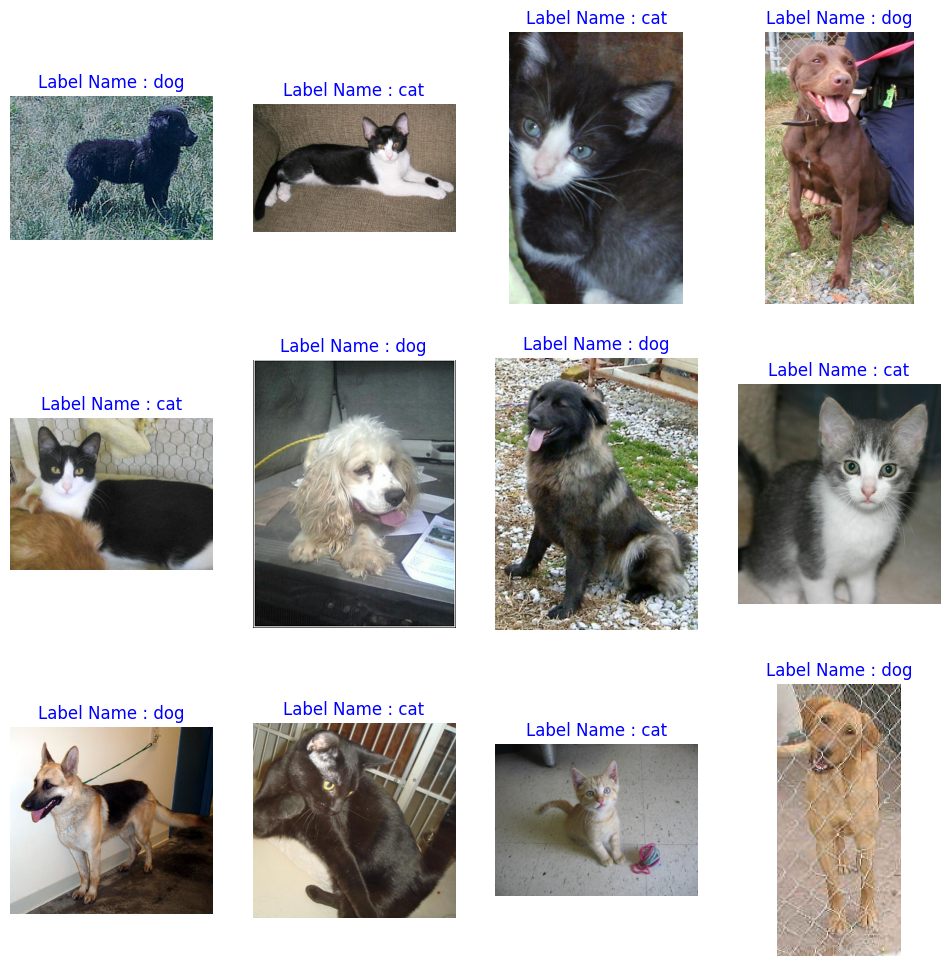

In [50]:
plt.figure(figsize=(12, 12))

for i in range(12):
      ax = plt.subplot(3, 4, i + 1)
      plt.imshow(images[i])
      plt.title(f"Label Name : {candidate_labels[labels[i]]}", color = "blue")
      plt.axis("off")


In [51]:

checkpoint = "openai/clip-vit-large-patch14"
detector = pipeline(model=checkpoint, task="zero-shot-image-classification")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor confi

In [52]:


model = AutoModelForZeroShotImageClassification.from_pretrained(checkpoint)
processor = AutoProcessor.from_pretrained(checkpoint)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [53]:
candidate_labels

['cat', 'dog']

In [54]:
inputs = processor(images=images, text=candidate_labels, return_tensors="pt", padding=True)

In [55]:
with torch.no_grad():
    outputs = model(**inputs)

In [56]:
output_prob=outputs.logits_per_image.softmax(dim=-1).numpy().tolist()

In [57]:
output_pred=[np.argmax(i) for i in output_prob]

In [58]:
output_pred[:5]

[1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [59]:
labels[:5]

[1, 0, 0, 1, 0]

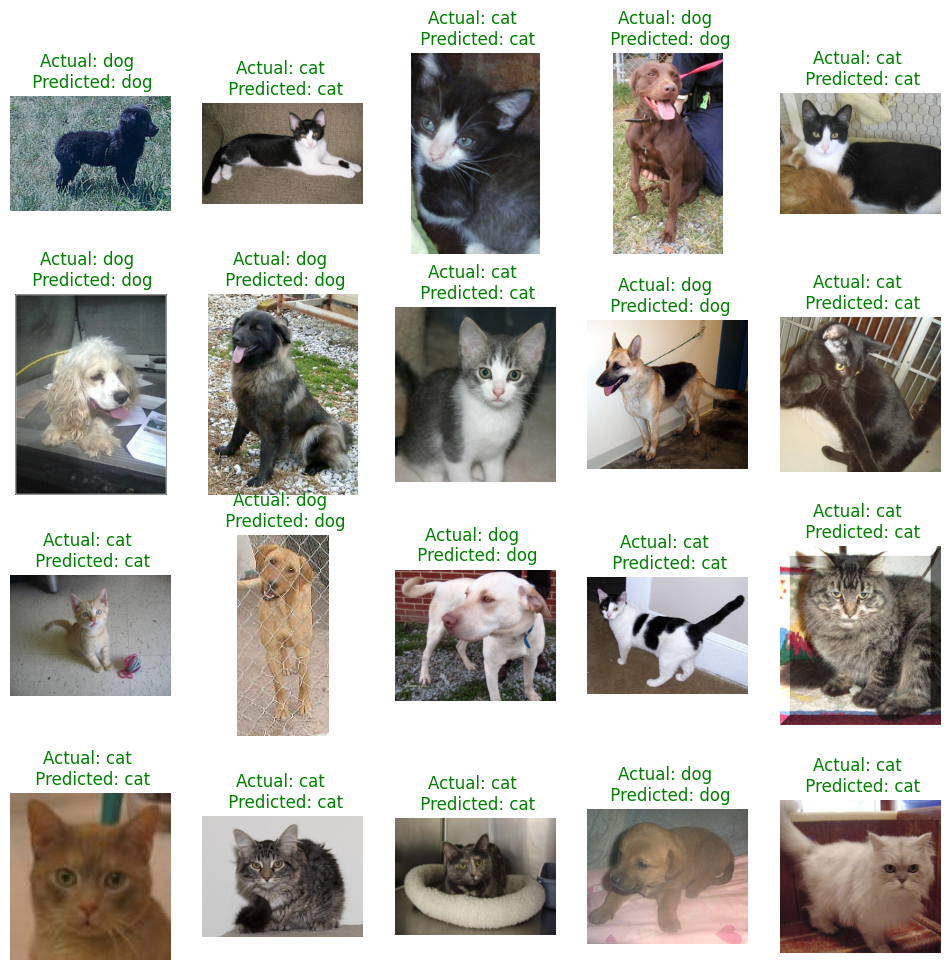

In [60]:
plt.figure(figsize=(12, 12))

for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(images[i])
    actual_label = candidate_labels[labels[i]]
    predicted_label = candidate_labels[output_pred[i]]

    # Check if the actual and predicted labels are the same
    if actual_label == predicted_label:
        label_color = 'green'
    else:
        label_color = 'red'

    plt.title(f'Actual: {actual_label} \n Predicted: {predicted_label}', color=label_color)
    plt.axis("off")

plt.show()

In [61]:
accuracy_score(labels, output_pred)*100

100.0

In [62]:
f1_score_value = f1_score(output_pred, labels, average="macro")
precision_score_value = precision_score(output_pred, labels, average="macro")
recall_score_value = recall_score(output_pred, labels, average="macro")

# Print the Results
print(f"F1-Score:{f1_score_value}")
print(f"Precision:{precision_score_value}")
print(f"Recall:{recall_score_value}")

F1-Score:1.0
Precision:1.0
Recall:1.0


In [63]:
actual_labels = list(map(lambda e: candidate_labels[e], labels))

In [64]:
predicted_labels = list(map(lambda e: candidate_labels[e], output_pred))

In [65]:
print("Classification_Report")
print("-----------------------")
print(classification_report(actual_labels,predicted_labels))

Classification_Report
-----------------------
              precision    recall  f1-score   support

         cat       1.00      1.00      1.00       100
         dog       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Confusion_Matrix
----------------------


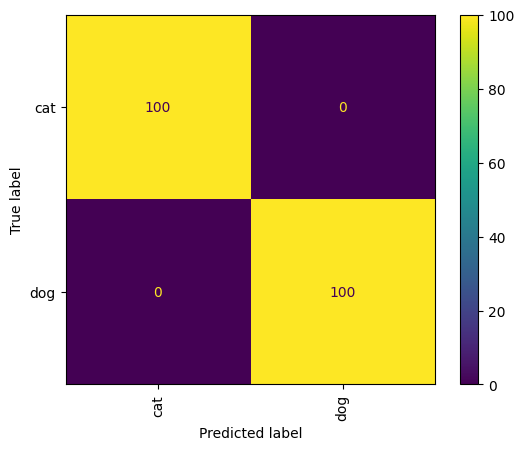

In [67]:
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(labels, output_pred, display_labels=candidate_labels, xticks_rotation="vertical")
plt.show()